In [15]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time series models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Machine learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [17]:
df = pd.read_csv("../data/arecanut_price.xls")
df.head(20)

,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,api,14011,14930,14470,29-Jan-11
1,api,14809,14809,14809,23-Nov-12
2,api,29389,29999,29877,28-Feb-17
3,api,41099,41099,41099,10-Nov-20
4,api,20319,24509,22610,4-Feb-14
5,api,36569,38119,37399,20-May-14
6,Bette,7000,9000,8000,27-Dec-02
7,Bette,38009,38009,38009,3-Mar-15
8,Bette,39509,39509,39509,17-Mar-15
9,Bette,40009,40009,40009,6-Mar-14


In [18]:
df.columns

Index(['Variety', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [19]:
df.isnull().sum()

Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [20]:
df["Price Date"] = pd.to_datetime(df["Price Date"], format='%d-%b-%y', errors='coerce')

In [25]:
# Reload and process data
df = pd.read_csv("../data/arecanut_price.xls")
df["Price Date"] = pd.to_datetime(df["Price Date"], format='%d-%b-%y', errors='coerce')
df = df.dropna(subset=["Price Date"])
df = df.sort_values(by="Price Date").set_index("Price Date")

df.head()

,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,
2002-04-05,Chali,2889,3809,3749
2002-04-05,Cqca,2409,2819,2629
2002-04-08,EDI,6810,8299,7610
2002-04-08,Saraku,9289,11201,10590
2002-04-08,Cqca,2299,2899,2699


       Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
count             47670.000000             47670.000000   
mean              18463.312062             23399.572498   
std               13582.299863             17318.115202   
min                   0.000000                 0.000000   
25%                8009.000000             10136.000000   
50%               14009.000000             17769.000000   
75%               27989.000000             34699.000000   
max               77700.000000             91450.000000   

       Modal Price (Rs./Quintal)  
count               47670.000000  
mean                22203.051290  
std                 16268.728768  
min                     0.000000  
25%                  9689.000000  
50%                 16899.000000  
75%                 33669.000000  
max                 85500.000000  
Variety                      0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
dtype: int64


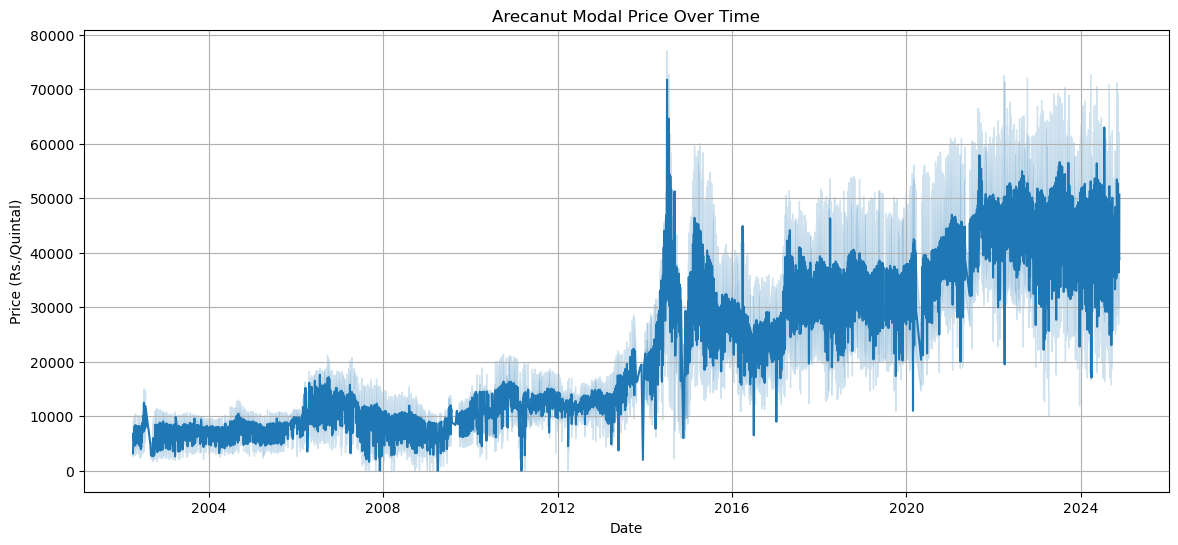

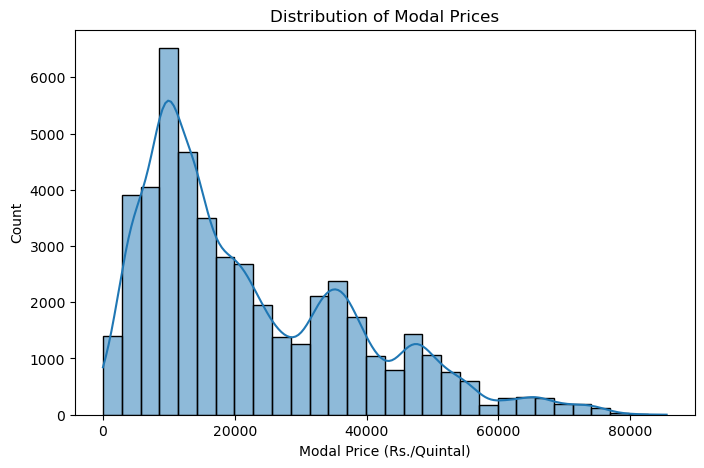

In [27]:
# Summary statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

# Plot modal price trend
plt.figure(figsize=(14,6))
sns.lineplot(x=df.index, y=df['Modal Price (Rs./Quintal)'])
plt.title("Arecanut Modal Price Over Time")
plt.xlabel("Date"); plt.ylabel("Price (Rs./Quintal)")
plt.grid(); plt.show()

# Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(df['Modal Price (Rs./Quintal)'], bins=30, kde=True)
plt.title("Distribution of Modal Prices")
plt.show()

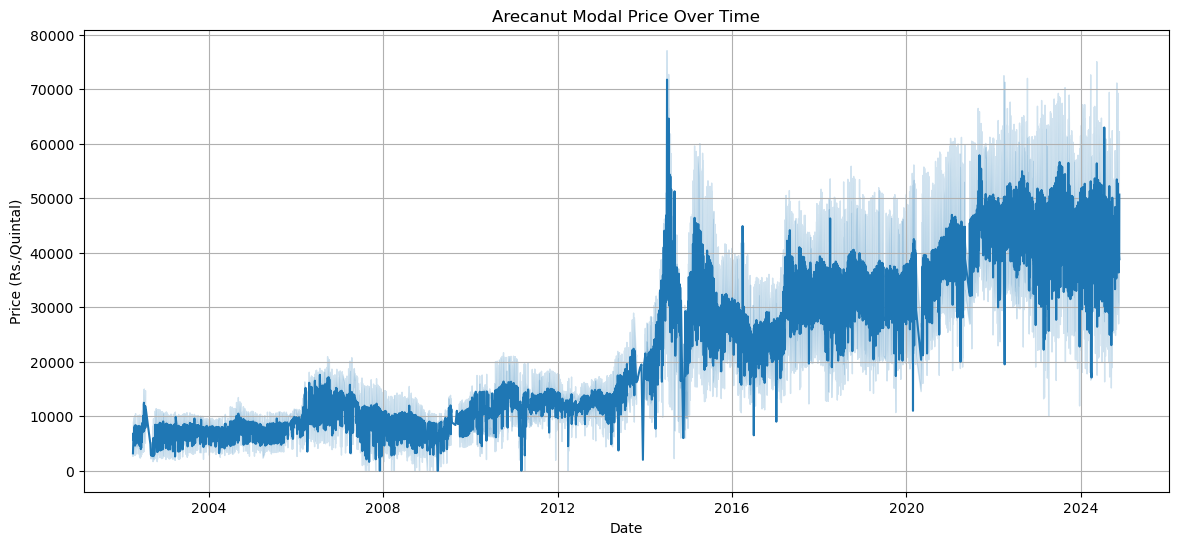

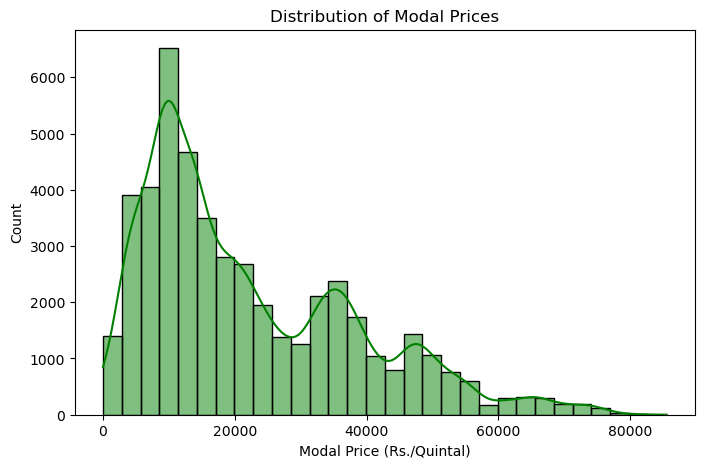

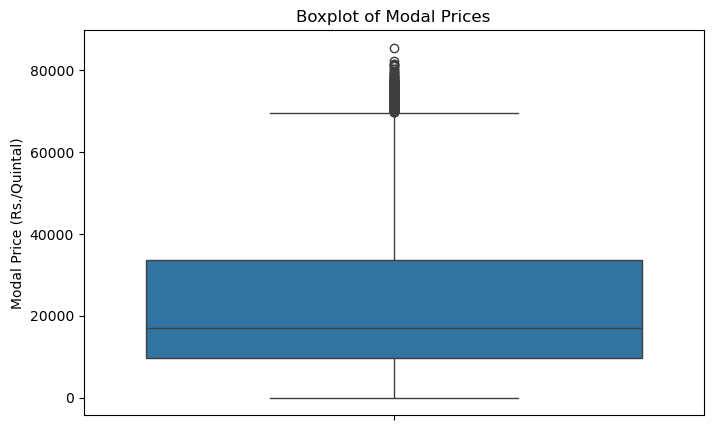

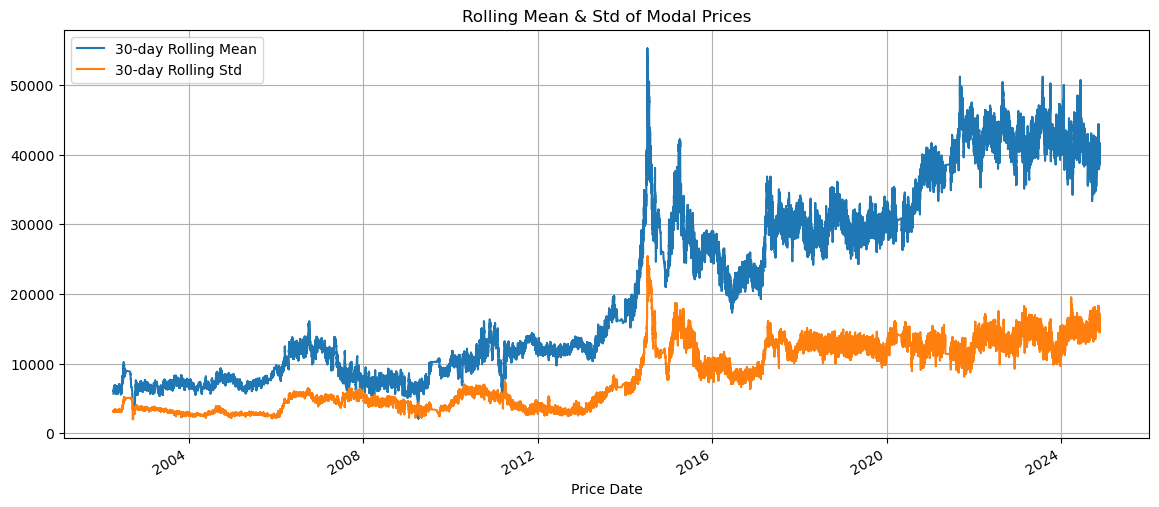

In [28]:
# Line plot of modal price trend
plt.figure(figsize=(14,6))
sns.lineplot(x=df.index, y=df['Modal Price (Rs./Quintal)'])
plt.title("Arecanut Modal Price Over Time")
plt.xlabel("Date"); plt.ylabel("Price (Rs./Quintal)")
plt.grid(); plt.show()

# Distribution of prices
plt.figure(figsize=(8,5))
sns.histplot(df['Modal Price (Rs./Quintal)'], bins=30, kde=True, color="green")
plt.title("Distribution of Modal Prices")
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Modal Price (Rs./Quintal)'])
plt.title("Boxplot of Modal Prices")
plt.show()

# Rolling mean and std (trend + volatility)
plt.figure(figsize=(14,6))
df['Modal Price (Rs./Quintal)'].rolling(window=30).mean().plot(label="30-day Rolling Mean")
df['Modal Price (Rs./Quintal)'].rolling(window=30).std().plot(label="30-day Rolling Std")
plt.title("Rolling Mean & Std of Modal Prices")
plt.legend(); plt.grid(); plt.show()


In [29]:
result = adfuller(df['Modal Price (Rs./Quintal)'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.8828623893531673
p-value: 0.34016563084371254


In [30]:
# Fill missing values with interpolation
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].interpolate()


In [31]:
prices = df['Modal Price (Rs./Quintal)']
train_size = int(len(prices) * 0.8)
train, test = prices[:train_size], prices[train_size:]


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

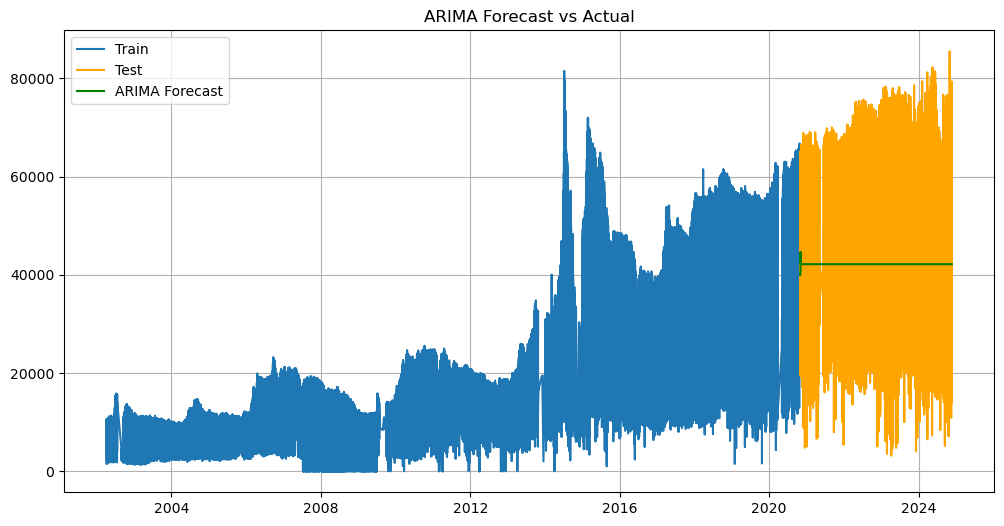

In [32]:
# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test))

# Plot ARIMA forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="green")
plt.title("ARIMA Forecast vs Actual")
plt.legend(); plt.grid(); plt.show()


In [36]:
# Reset indices to align for comparison
test_reset = test.reset_index(drop=True)
forecast_reset = pd.Series(forecast).reset_index(drop=True)

mae = mean_absolute_error(test_reset, forecast_reset)
mse = mean_squared_error(test_reset, forecast_reset)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_reset - forecast_reset) / test_reset)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 11111.64
MSE: 191120573.75
RMSE: 13824.64
MAPE: 34.23%


In [37]:
# Create lag features for ML model
df_ml = df.copy()
df_ml['Lag1'] = df_ml['Modal Price (Rs./Quintal)'].shift(1)
df_ml['Lag2'] = df_ml['Modal Price (Rs./Quintal)'].shift(2)
df_ml = df_ml.dropna()

X = df_ml[['Lag1','Lag2']]
y = df_ml['Modal Price (Rs./Quintal)']

# Train/test split
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluate
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


Random Forest MAE: 15347.557479719202
Random Forest RMSE: 19390.980293177683


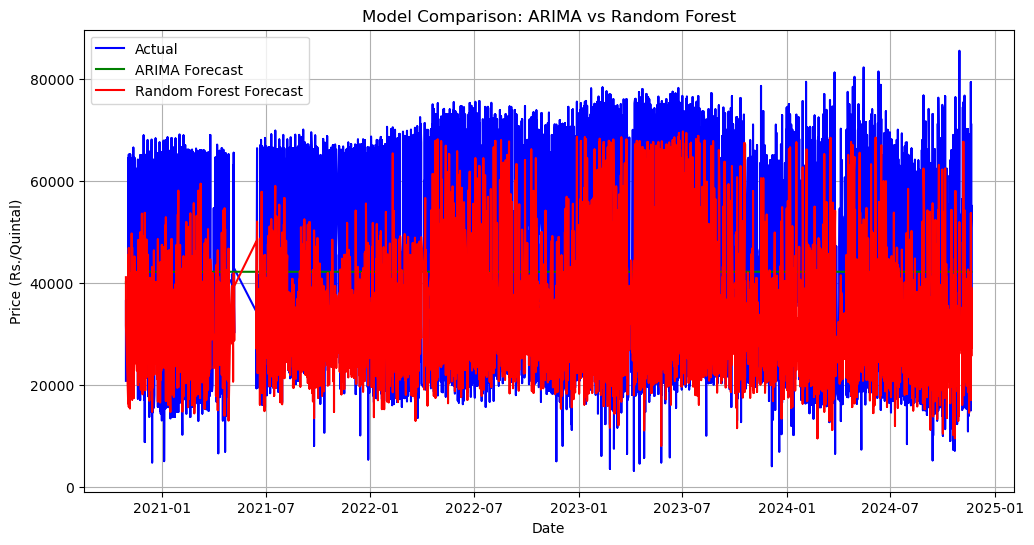

In [38]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test.values, label="Actual", color="blue")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="green")
plt.plot(y_test.index, rf_pred, label="Random Forest Forecast", color="red")
plt.title("Model Comparison: ARIMA vs Random Forest")
plt.xlabel("Date"); plt.ylabel("Price (Rs./Quintal)")
plt.legend(); plt.grid(); plt.show()